In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time
import sys
sys.path.insert(0,'../..')
from keras import losses, metrics
from tensorflow.keras import optimizers
import gp2
from gp2 import Runner

2023-04-25 21:23:22.252883: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPUs will likely run quickly with dtype policy mixed_float16 as they all have compute capability of at least 7.0


2023-04-25 21:23:23.854721: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2023-04-25 21:23:23.973020: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:0f:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-04-25 21:23:23.975588: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:47:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-04-25 21:23:23.978121: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 2 with properties: 
pciBusID: 0000:4e:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-04-25 21:23:23.98

In [3]:
help(gp2.KUNetPlus2D)

Help on class KUNetPlus2D in module gp2.classifiers.k_unet_plus2d:

class KUNetPlus2D(gp2.classifiers.base_keras_segmentation_classifier.BaseKerasSegmentationClassifier)
 |  KUNetPlus2D(input_size=(512, 512, 1), filter_num=None, n_labels=1, stack_num_down=3, stack_num_up=3, activation='ReLU', output_activation='Sigmoid', batch_norm=True, pool=True, unpool=True, deep_supervision=False, backbone=None, weights='imagenet', freeze_backbone=True, freeze_batch_norm=True, name='xnet', optimizer=None, loss=None, metric=None, verbose=False, workingdir='/tmp')
 |  
 |  Keras U-net++ 2D model.
 |  
 |  Method resolution order:
 |      KUNetPlus2D
 |      gp2.classifiers.base_keras_segmentation_classifier.BaseKerasSegmentationClassifier
 |      gp2.classifiers.classifier.Classifier
 |      abc.ABC
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, input_size=(512, 512, 1), filter_num=None, n_labels=1, stack_num_down=3, stack_num_up=3, activation='ReLU', output_activation

In [4]:
R = Runner(verbose=True, 
           classifier='kunetplus2d',
           discriminator='cnnplus',
           filter_num= [16, 32, 64, 128, 256, 512, 1024],
           stack_num_down=3, 
           stack_num_up=3, 
           activation='ReLU', 
           output_activation='Sigmoid', 
           batch_norm=True, 
           pool=True, 
           unpool=True, 
           deep_supervision=False,
           weights=None, 
           freeze_backbone=True, 
           freeze_batch_norm=True,
           optimizer=None, 
           loss=gp2.Util.hybrid_loss, 
           metric=None           
          )

2023-04-25 21:23:26.414621: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-25 21:23:26.972645: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:0f:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-04-25 21:23:26.975047: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:47:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-04-25 21:23:26.977401: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 2 

*** GP2  KUNetPlus2D ***
Working directory: /tmp/tmp33962_jfGP2
Verbose mode active!
{'verbose': True, 'workingdir': '/tmp/tmp33962_jfGP2', 'input_size': (512, 512, 1), 'filter_num': [16, 32, 64, 128, 256, 512, 1024], 'n_labels': 1, 'stack_num_down': 3, 'stack_num_up': 3, 'activation': 'ReLU', 'output_activation': 'Sigmoid', 'batch_norm': True, 'pool': True, 'unpool': True, 'deep_supervision': False, 'backbone': None, 'weights': 'imagenet', 'freeze_backbone': True, 'freeze_batch_norm': True, 'name': 'xnet', 'optimizer': <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7f2364598df0>, 'loss': <tensorflow.python.eager.def_function.Function object at 0x7f236c5dcbb0>, 'metric': [<tensorflow.python.eager.def_function.Function object at 0x7f236c5dc880>], 'model': <tensorflow.python.keras.engine.functional.Functional object at 0x7f22b44c0880>}
Model summary:
Model: "xnet_model"
_________________________________________________________________
Layer (type)                 Output Shap

In [5]:
# load our larger toy dataset (10k images and masks)
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/GP2TOYEXAMPLE_LARGE/images.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/GP2TOYEXAMPLE_LARGE/masks.npy')

In [6]:
images = images[:5000]
masks = masks[:5000]

In [7]:
images.shape

(5000, 512, 512, 1)

In [8]:
masks.shape

(5000, 512, 512, 1)

In [9]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}

In [10]:
R.run(images=images, masks=masks, weights=weights, runs=7)     

Weights OK!
******
Loop 0


2023-04-25 21:23:39.835496: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2023-04-25 21:23:39.854994: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2245755000 Hz


Epoch 1/100


2023-04-25 21:23:44.338987: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2023-04-25 21:23:44.993107: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8201
2023-04-25 21:23:45.699146: W tensorflow/stream_executor/gpu/asm_compiler.cc:191] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.0
2023-04-25 21:23:45.699170: W tensorflow/stream_executor/gpu/asm_compiler.cc:194] Used ptxas at ptxas
2023-04-25 21:23:45.699227: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Unimplemented: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2023-04-25 21:23:45.714960: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-04-25 21:23:46.424862: I tensorflow/stream_exec

4/4 [==============================] - 37s 6s/step - loss: 1.7950 - dice_coef: 0.1568 - val_loss: 1.7861 - val_dice_coef: 0.1632


2023-04-25 21:24:21.237808: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /tmp/tmp33962_jfGP2/xnet_0xnet_model/assets
Epoch 2/100
4/4 [==============================] - 4s 1s/step - loss: 1.7589 - dice_coef: 0.1831 - val_loss: 1.7864 - val_dice_coef: 0.1630
Epoch 3/100
4/4 [==============================] - 4s 1s/step - loss: 1.7055 - dice_coef: 0.2208 - val_loss: 1.7870 - val_dice_coef: 0.1626
Epoch 4/100
4/4 [==============================] - 4s 1s/step - loss: 1.6529 - dice_coef: 0.2571 - val_loss: 1.7875 - val_dice_coef: 0.1622
Epoch 5/100
4/4 [==============================] - 4s 1s/step - loss: 1.6032 - dice_coef: 0.2909 - val_loss: 1.7883 - val_dice_coef: 0.1616
Epoch 6/100
4/4 [==============================] - 4s 1s/step - loss: 1.5641 - dice_coef: 0.3166 - val_loss: 1.7890 - val_dice_coef: 0.1611
Epoch 7/100
4/4 [==============================] - 4s 1s/step - loss: 1.5295 - dice_coef: 0.3386 - val_loss: 1.7898 - val_dice_coef: 0.1605
Epoch 8/100
4/4 [==============================] - 4s 1s/step - loss: 1.5047 - di

Testing the classifier...
INFO:tensorflow:Assets written to: /tmp/tmp33962_jfGP2/cnnd_0.model/assets
INFO:tensorflow:Assets written to: /tmp/tmp33962_jfGP2/cnnd_0.model/assets
INFO:tensorflow:Assets written to: /tmp/tmp33962_jfGP2/cnnd_0.model/assets
Model saved to /tmp/tmp33962_jfGP2/cnnd_0.model
History saved to /tmp/tmp33962_jfGP2/cnnd_history_0.pickle
Testing the discriminator...
10/10 [==============================] - 0s 20ms/step - loss: 0.0379 - accuracy: 0.9900
Found 152 machine labels.
Machine labels [  4   6   9  10  11  12  14  15  19  24  25  28  30  32  33  34  35  36
  39  40  41  43  44  45  47  48  49  50  53  55  57  58  60  61  62  63
  66  67  69  72  73  74  76  77  84  85  91  92  94  95  96  97  98  99
 101 104 107 108 109 111 114 119 120 121 122 123 127 132 137 139 142 143
 144 145 147 148 149 150 154 155 156 158 161 162 163 164 165 172 173 177
 180 181 182 184 185 189 190 193 194 197 198 199 201 202 203 205 206 207
 208 210 212 215 216 217 218 219 221 222 223 2

Epoch 1/100
5/5 [==============================] - 14s 3s/step - loss: 1.1938 - dice_coef: 0.5383 - val_loss: 1.7365 - val_dice_coef: 0.1988
INFO:tensorflow:Assets written to: /tmp/tmp33962_jfGP2/xnet_1xnet_model/assets
Epoch 2/100
5/5 [==============================] - 5s 1s/step - loss: 1.1861 - dice_coef: 0.5416 - val_loss: 1.7239 - val_dice_coef: 0.2078
INFO:tensorflow:Assets written to: /tmp/tmp33962_jfGP2/xnet_1xnet_model/assets
Epoch 3/100
5/5 [==============================] - 5s 1s/step - loss: 1.1826 - dice_coef: 0.5431 - val_loss: 1.7266 - val_dice_coef: 0.2059
Epoch 4/100
5/5 [==============================] - 5s 1s/step - loss: 1.1760 - dice_coef: 0.5461 - val_loss: 1.7234 - val_dice_coef: 0.2081
INFO:tensorflow:Assets written to: /tmp/tmp33962_jfGP2/xnet_1xnet_model/assets
Epoch 5/100
5/5 [==============================] - 5s 1s/step - loss: 1.1704 - dice_coef: 0.5503 - val_loss: 1.6795 - val_dice_coef: 0.2388
INFO:tensorflow:Assets written to: /tmp/tmp33962_jfGP2/xnet_1x

Replacing 85 from 255 !
D_relabeled_ 85
selected_ids ['c1518455-fc2a-466d-9f09-8f97516e167d', '62432946-d727-4705-a7ee-52c24d37b3fe', 'b2daee1e-5b90-424d-99ec-d9215a72c0ed', '785c760f-0c88-48ac-a489-5d3b24d27d53', '88caeda0-fd7a-488e-b452-a0a9c11f3a1f', 'da5a86f3-3306-41b8-9d50-47cabe132d77', 'e750a578-b1c4-41ee-8463-08a90077877e', 'ed39af6a-f602-4ec8-8477-c7d8dc893e07', '6212981d-9638-4ceb-a4f0-680eb32b3921', '32b40e8e-ce44-4657-aa42-39479ef073f2', 'a51d8c8d-e4d4-446e-8e48-1b172103ab0f', '4493d3e4-3f47-4927-a906-cab2090dc9bc', '2d0b25ed-6e2e-4a9f-bc36-ededd91bc0dc', 'be5fb861-718f-4c52-89dc-3a6a7a4eb100', '67898804-cc6a-49fe-951c-d81db1a3d8bc', '30f261e3-8ab6-405e-b839-53beb69b30fc', '0d823f31-5835-4b85-9942-54e0719231f8', '8a1c9c53-eed5-4570-aace-6924e2e539fa', '893ca22b-b7e7-486e-bbd2-b5340673fed5', '2f7857ec-a02d-4324-83ca-55924d48d845', '0cf3c1cb-91ad-48d3-bac3-8cbc994ba99d', '91fadcea-8d4e-4eb9-b0ef-3891613be4dc', '96232cc9-494f-4792-a957-5d625feb42d6', 'b6b68b65-3190-4359-87ce-f

Replacing 63 from 191 !
D_relabeled_ 63
selected_ids ['8024d77c-e511-4346-8f3c-224faa1b1aef', '15f84bd7-e3cd-4e0e-aaa6-0b85d21ca207', 'b2f28712-bbff-40fd-a98c-9baea3654741', '84dbbd3a-4fc6-4508-b658-5d3142c29caf', 'a3997149-d554-4d95-b9f6-c4c2f10b6a63', 'b0c7a280-7f90-44ce-813e-c2ace2d06f8a', 'f5d960bd-825d-4c7b-96b2-33828ac19751', 'c9fd6b20-3d5a-49e8-87d9-ee4911c1194a', '7dc5adf3-aca5-42e1-bd43-8a7d2518e5a3', '09352ab5-1e64-42e0-94fb-8658196eff08', '11fd6f68-5bc7-475a-996e-b0a2b608be51', '5474835a-cf20-49e8-aec3-5d5642cce04d', 'fc1a8b62-2ac4-419c-bdd5-d2c5b74dfe4f', '072017b1-b9e4-4d55-90f7-36911e8c32e5', 'a8c2b1b4-2caf-4e28-8756-c7c77f4e46f8', '7913fbe5-d8bb-402f-843e-9551a0f3d66e', '3754ad13-3ed4-42bf-895c-0858956206a5', 'c5a1dd38-349f-4062-bc1f-3f066e4bc439', 'e3c30120-6c95-41ae-8e71-1a2da6e2216b', '8ffad7d9-0cd3-467f-8d45-f1a091489867', '853ba254-6c4f-48a8-8c9a-7d87c6e273c7', 'b943ee35-8e52-4d59-ba3c-6ddcf5b179b5', '5f7c13f8-21ff-4ace-b7ab-74923c225584', 'f421575b-32b6-4b89-8f4e-e

INFO:tensorflow:Assets written to: /tmp/tmp33962_jfGP2/xnet_3xnet_model/assets
Epoch 15/100
7/7 [==============================] - 7s 983ms/step - loss: 1.0561 - dice_coef: 0.6092 - val_loss: 1.1267 - val_dice_coef: 0.5731
INFO:tensorflow:Assets written to: /tmp/tmp33962_jfGP2/xnet_3xnet_model/assets
Epoch 16/100
7/7 [==============================] - 7s 994ms/step - loss: 1.0518 - dice_coef: 0.6114 - val_loss: 1.1292 - val_dice_coef: 0.5718
Epoch 17/100
7/7 [==============================] - 7s 966ms/step - loss: 1.0434 - dice_coef: 0.6157 - val_loss: 1.1266 - val_dice_coef: 0.5732
INFO:tensorflow:Assets written to: /tmp/tmp33962_jfGP2/xnet_3xnet_model/assets
Epoch 18/100
7/7 [==============================] - 7s 1s/step - loss: 1.0379 - dice_coef: 0.6184 - val_loss: 1.1264 - val_dice_coef: 0.5734
INFO:tensorflow:Assets written to: /tmp/tmp33962_jfGP2/xnet_3xnet_model/assets
Epoch 19/100
7/7 [==============================] - 7s 996ms/step - loss: 1.0342 - dice_coef: 0.6202 - val_loss

Replacing 86 from 259 !
D_relabeled_ 86
selected_ids ['415db371-01e3-456e-91de-1d62e7f16bb6', '9b9d9fd1-b132-468d-9beb-f86547ca7cf8', '8b711d16-b3e7-47cd-a34e-802fdbdc943b', '918216c6-1773-4025-a379-cac7e6a41b70', 'a182adc3-8ec6-474f-b557-2bf771b1e341', '923275bc-903c-4621-bf42-132557f18d4e', 'eb584c9a-c59e-45c1-a9b9-59dbe3312fcf', '9f32abc2-037b-4e11-abd2-be26fd442da9', '8111b6cf-7805-47bb-a8ec-702c19b43c8c', 'b8853bf3-ed9f-46bd-9d9e-5b3f9a4a60d8', 'd0e01812-ad53-4895-86bf-eb68e2df846e', 'd21ef906-ebc5-4343-96b4-0fc3b3ca9d20', '42027ac8-8715-412e-81e5-be36ecaf12cd', 'ede4ba59-e48c-4c81-bd26-2c707557ff71', 'b8d986d5-859f-4607-82d6-4598a29983d9', '8214c06d-8641-425b-a61f-c66aab696f8e', 'f1bfb847-15aa-4b4b-9d44-861b54d3e1c3', 'f2923093-a925-4774-8fea-55836a4933cb', '3e65ac3f-ccf6-4128-a546-18238f64e8b9', '7c26d9d9-01cb-42ed-a322-f9fcff425b46', '3e57d6ed-6d04-4079-b23b-6f3d6dffb1ab', 'e6181f03-ce91-412b-93a1-412f972c752c', '706bd21e-9e9c-4ddd-97b8-102f407cb14a', '2a37c99e-4aa6-408c-96fb-7

Epoch 7/100
9/9 [==============================] - 8s 887ms/step - loss: 0.9998 - dice_coef: 0.6355 - val_loss: 1.0669 - val_dice_coef: 0.6039
INFO:tensorflow:Assets written to: /tmp/tmp33962_jfGP2/xnet_4xnet_model/assets
Epoch 8/100
9/9 [==============================] - 8s 891ms/step - loss: 0.9961 - dice_coef: 0.6397 - val_loss: 1.0621 - val_dice_coef: 0.6064
INFO:tensorflow:Assets written to: /tmp/tmp33962_jfGP2/xnet_4xnet_model/assets
Epoch 9/100
9/9 [==============================] - 8s 874ms/step - loss: 0.9861 - dice_coef: 0.6425 - val_loss: 1.0584 - val_dice_coef: 0.6083
INFO:tensorflow:Assets written to: /tmp/tmp33962_jfGP2/xnet_4xnet_model/assets
Epoch 10/100
9/9 [==============================] - 8s 849ms/step - loss: 0.9836 - dice_coef: 0.6442 - val_loss: 1.0502 - val_dice_coef: 0.6123
INFO:tensorflow:Assets written to: /tmp/tmp33962_jfGP2/xnet_4xnet_model/assets
Epoch 11/100
9/9 [==============================] - 8s 876ms/step - loss: 0.9749 - dice_coef: 0.6499 - val_loss

Replacing 78 from 234 !
D_relabeled_ 78
selected_ids ['1dbbfaaf-9460-41ed-9780-cb409cc93e9e', '5b368ffd-c316-4216-959c-482b28da315b', 'd5af8d0d-28c6-441b-b3da-39cb44434fa1', '2d7878f8-6505-4245-b152-8a02cd186751', '616e053f-6a98-4cbf-83c8-ebfebaa648b5', 'aed6367d-680e-4207-bcb8-5cf711764c13', '23e0c55c-5591-484b-8596-fd5ce3b1a909', 'd7ce451e-4c1a-403f-8e00-3fd54aa1fc23', 'f410bb45-7ded-43df-8b61-083d5b2e5552', '8a232675-6062-49f0-8c0f-6580d133dd2e', '0b9e84e6-66cd-4ed0-89ab-995cb6098514', '0e47011b-bec2-4b5e-b992-6c83a2f75c6b', '5de673db-b0a1-4840-8fc7-cbbf98460eec', 'f65b8ff6-67d3-4c22-9bd4-13cc7ce65bf3', 'e40a833e-2523-46e6-8741-eebb68b4663a', '179c7365-a849-4e15-acd1-60938926f50d', 'b152be35-8cc3-470e-9c39-e9e0d87b6196', '443fbcd4-3a57-4c43-96da-4d64cb2fe8a9', '6b39c77c-af77-4c21-a10b-17d7b982161c', 'd10ecba4-ef93-4044-a39f-bf0dd2c514eb', '727f1750-12fd-495e-9f63-0361bd62b4f3', '1a1cffce-a323-46ef-881a-2db02bb51820', '359ccfca-7ede-42cf-a52c-b05401640afc', '12a34792-31c2-429c-80f9-7

Epoch 10/100
10/10 [==============================] - 9s 886ms/step - loss: 0.8622 - dice_coef: 0.7021 - val_loss: 0.9463 - val_dice_coef: 0.6632
INFO:tensorflow:Assets written to: /tmp/tmp33962_jfGP2/xnet_5xnet_model/assets
Epoch 11/100
10/10 [==============================] - 9s 865ms/step - loss: 0.8581 - dice_coef: 0.7045 - val_loss: 0.9532 - val_dice_coef: 0.6599
Epoch 12/100
10/10 [==============================] - 9s 866ms/step - loss: 0.8513 - dice_coef: 0.7071 - val_loss: 0.9414 - val_dice_coef: 0.6655
INFO:tensorflow:Assets written to: /tmp/tmp33962_jfGP2/xnet_5xnet_model/assets
Epoch 13/100
10/10 [==============================] - 9s 870ms/step - loss: 0.8464 - dice_coef: 0.7103 - val_loss: 0.9665 - val_dice_coef: 0.6535
Epoch 14/100
10/10 [==============================] - 8s 855ms/step - loss: 0.8473 - dice_coef: 0.7089 - val_loss: 0.9417 - val_dice_coef: 0.6654
Epoch 15/100
10/10 [==============================] - 9s 867ms/step - loss: 0.8321 - dice_coef: 0.7158 - val_los

Replacing 79 from 238 !
D_relabeled_ 79
selected_ids ['786b76be-9072-4f63-bc6d-a6b93fba46a0', '57ab6b20-6443-42c6-a572-341b9abc3180', '9cb5ec45-cb9d-46d3-a747-fff2327a7d83', '833aaab8-1297-4a24-b59e-a52187c8e4ad', '79c37b05-2e39-4267-8648-0fb14d390a97', 'daca9264-c11f-4cb0-a919-db2745801d2c', 'de0ab2bc-930b-4a35-ac6a-ae4ad40ed721', 'ccce465c-f31d-478c-a512-b76cfca81d6a', 'c3126813-5ee5-4ca4-801d-3f403e60acd4', '46c45e17-680c-405d-bb5f-10675fed9ea8', '382b83b7-ae7f-4a4f-8d56-b23075c2b664', 'f3bcde09-483d-43e5-8c60-f6e2f1fa813d', 'f43380d4-980d-4949-9463-6d956f769ac4', '09e1c2b3-9e6b-41ed-9f10-f2f917d435ed', '41e90314-db2e-4171-a83a-a0cc43af5d3b', '65070f25-8823-473f-a634-194ca1d98687', 'd53a2817-0dc7-4b79-ba73-f9ff1e702a21', 'fc5f421c-7a72-45ad-873f-f47516deecb1', 'afe31a5b-ec58-4c57-ae9c-819e473dd056', '76e72c7a-13aa-40b9-ad31-7024f356d661', '2013409c-d34a-4a15-abf5-a05e533c27d9', 'f5047423-1ae1-4b48-8a6f-c6f30e3d9d27', 'c674d66d-8bd2-482e-a2ab-9e811da80b2d', '5a255619-8670-4d21-af56-4

Epoch 9/100
11/11 [==============================] - 10s 883ms/step - loss: 0.7512 - dice_coef: 0.7508 - val_loss: 0.8593 - val_dice_coef: 0.7036
Epoch 10/100
11/11 [==============================] - 9s 852ms/step - loss: 0.7512 - dice_coef: 0.7510 - val_loss: 0.8461 - val_dice_coef: 0.7096
INFO:tensorflow:Assets written to: /tmp/tmp33962_jfGP2/xnet_6xnet_model/assets
Epoch 11/100
11/11 [==============================] - 10s 880ms/step - loss: 0.7485 - dice_coef: 0.7521 - val_loss: 0.8409 - val_dice_coef: 0.7119
INFO:tensorflow:Assets written to: /tmp/tmp33962_jfGP2/xnet_6xnet_model/assets
Epoch 12/100
11/11 [==============================] - 9s 863ms/step - loss: 0.7377 - dice_coef: 0.7567 - val_loss: 0.8381 - val_dice_coef: 0.7131
INFO:tensorflow:Assets written to: /tmp/tmp33962_jfGP2/xnet_6xnet_model/assets
Epoch 13/100
11/11 [==============================] - 9s 868ms/step - loss: 0.7308 - dice_coef: 0.7598 - val_loss: 0.8380 - val_dice_coef: 0.7132
INFO:tensorflow:Assets written t

Replacing 76 from 230 !
D_relabeled_ 76
selected_ids ['796a33f5-0adb-49fc-b369-dbb664c08236', 'b1f77cad-4c95-4eac-83fa-fcfa7fd9405a', 'a6616dcc-3f70-478d-a88e-5a522c29d40a', 'cff3dea1-eb3b-4fa3-bfd3-f5f2b862fb08', '19e0dccf-2150-4d8a-88ab-7d4195b75f7c', '87317763-78e9-435e-af67-82898790adc5', '458dd843-1ff9-4793-ad4e-e9e9b951567b', '6229f6ee-27ab-4fdd-bb34-2579f77342cd', '97e061f8-0654-4f7e-9caf-916c42d20f13', '820ee056-dc3c-4ecf-8429-320669dadaa2', '89d4a0a2-ec2d-4a55-9be9-76354b41a94a', '1857acc9-0679-4611-b4af-791e76c754f1', '71b530b6-2b5a-4512-993d-1a3bb56d6c7c', '1b921d14-6f90-4303-879e-3d3fa77188db', 'bfc5fcec-6044-4b5d-b27a-4aae3d4c6d96', 'd6761852-9eba-4e6f-977c-c6dfc5e1b0cc', 'f1379698-b646-4e90-a279-6d0c73ea1bab', 'f819ec50-bf10-42e5-a56c-07489d651fa5', 'aef7fb02-fd9e-465e-9c00-190fa8705f53', '0c1d8a8c-00f2-4f67-bd9e-361bf632108e', '50f80868-1dc5-475c-a3d7-f6e643ba0478', 'fe8421c3-4223-4b4f-b88b-dc2d0d1ecb95', 'aa51e8c9-7cca-424c-bfbd-654c5f050d42', '087332ed-ee03-4eff-b930-d

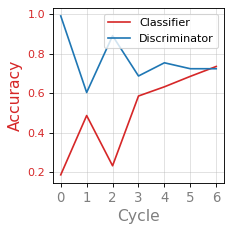

In [11]:
R.plot()

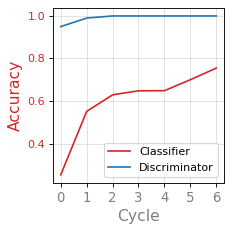

In [11]:
R.plot()